## Problem Statement:
In this project, I implement Logistic Regression with Python and Scikit-Learn. I build a classifier to predict whether or not it will rain tomorrow in Australia by training a binary classification model using Logistic Regression. I have used the **Rain in Australia** dataset downloaded from the Kaggle website for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("weatherAUS.csv")


In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Step 1: Explore Data
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# **Dataset Overview**

## **1. General Information**
- **Total Rows:** 145,460  
- **Total Columns:** 23  
- **Target Variable:** `RainTomorrow` (Binary: "Yes" or "No")  
- **Data Types:**  
  - **Numerical Features:** 16  
  - **Categorical Features:** 7  

---

## **2. Feature Description**

| **Column**         | **Description** |
|--------------------|----------------|
| `Date`            | The date of the observation (YYYY-MM-DD). |
| `Location`        | The name of the weather station. |
| `MinTemp`         | Minimum temperature (°C) recorded for the day. |
| `MaxTemp`         | Maximum temperature (°C) recorded for the day. |
| `Rainfall`        | Amount of rainfall (mm) recorded for the day. |
| `Evaporation`     | Pan evaporation (mm) over 24 hours. |
| `Sunshine`        | Number of hours of bright sunshine in a day. |
| `WindGustDir`     | Direction of the strongest wind gust. |
| `WindGustSpeed`   | Speed (km/h) of the strongest wind gust. |
| `WindDir9am`      | Wind direction at 9 AM. |
| `WindDir3pm`      | Wind direction at 3 PM. |
| `WindSpeed9am`    | Wind speed (km/h) at 9 AM. |
| `WindSpeed3pm`    | Wind speed (km/h) at 3 PM. |
| `Humidity9am`     | Humidity (%) at 9 AM. |
| `Humidity3pm`     | Humidity (%) at 3 PM. |
| `Pressure9am`     | Atmospheric pressure (hPa) at 9 AM. |
| `Pressure3pm`     | Atmospheric pressure (hPa) at 3 PM. |
| `Cloud9am`        | Cloud cover at 9 AM (scale 0-9). |
| `Cloud3pm`        | Cloud cover at 3 PM (scale 0-9). |
| `Temp9am`         | Temperature (°C) at 9 AM. |
| `Temp3pm`         | Temperature (°C) at 3 PM. |
| `RainToday`       | Binary feature (Yes/No) indicating if it rained today. |
| `RainTomorrow`    | **Target variable** (Yes/No) indicating if it will rain tomorrow. |

---

## **3. Data Types**
- **Numerical Columns (16):**  
  - Continuous: `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am`, `Temp3pm`
- **Categorical Columns (7):**  
  - `Date` (convertible to datetime)
  - `Location`
  - `WindGustDir`, `WindDir9am`, `WindDir3pm`
  - `RainToday`, `RainTomorrow` (binary categorical)

---

## **4. Missing Values Analysis**
Several features contain missing values:

| **Column**         | **Missing Values** | **% Missing** |
|--------------------|------------------|--------------|
| `Evaporation`     | 62,790            | 43.2%        |
| `Sunshine`        | 69,835            | 48.0%        |
| `Cloud9am`        | 55,888            | 38.4%        |
| `Cloud3pm`        | 59,358            | 40.8%        |
| `WindGustDir`     | 10,326            | 7.1%         |
| `WindGustSpeed`   | 10,263            | 7.1%         |
| `WindDir9am`      | 10,566            | 7.3%         |
| `WindDir3pm`      | 4,228             | 2.9%         |
| `Pressure9am`     | 15,065            | 10.4%        |
| `Pressure3pm`     | 15,028            | 10.3%        |
| `Rainfall`        | 3,261             | 2.2%         |
| `RainToday`       | 3,261             | 2.2%         |
| `RainTomorrow`    | 3,267             | 2.2%         |

**Observations:**
- `Evaporation` and `Sunshine` have **the most missing values (~40-50%)**.
- `Cloud9am`, `Cloud3pm` have **38-41% missing data**.
- `Rainfall`, `RainToday`, and `RainTomorrow` have **~2% missing values**.

---

## **5. Initial Data Insights**
### **5.1 Temperature Distribution**
- `MinTemp` ranges from **-8.5°C to 33.9°C** (mean: **12.19°C**).
- `MaxTemp` ranges from **-4.8°C to 48.1°C** (mean: **23.22°C**).
- `Temp9am` and `Temp3pm` show expected variations, with **warmer temperatures in the afternoon**.

### **5.2 Rainfall Trends**
- **75% of the data has Rainfall ≤ 0.8 mm**, indicating that **most days have little or no rain**.
- Maximum rainfall recorded is **371 mm** (**extreme outlier**).
- Many days have **0 mm of rainfall**, making this a **highly skewed feature**.

### **5.3 Wind & Humidity**
- `WindGustSpeed` ranges from **6 km/h to 135 km/h** (average: **40 km/h**).
- **Humidity9am is higher (~69%)** than **Humidity3pm (~51%)**, showing the expected **decrease over the day**.

### **5.4 Pressure & Cloud Cover**
- `Pressure` varies between **980.5 hPa and 1041 hPa**.
- `Cloud9am` and `Cloud3pm` are **often between 4-5 (on a scale of 0-9), meaning partial cloudiness is common**.

---

## **6. Next Steps**
### **6.1 Handle Missing Values**
- Drop highly missing features like `Evaporation` and `Sunshine`.
- Impute missing values for `WindGustSpeed`, `Pressure`, and `Rainfall` using median or mode.
- Investigate missing patterns in `WindGustDir`, `WindDir9am`, and `WindDir3pm`.

### **6.2 Feature Engineering**
- Convert `Date` into meaningful features (`Year`, `Month`, `Day`, `Season`).
- Encode categorical variables (`Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday`).
- Create interaction features (e.g., `Temp` difference between 9 AM & 3 PM).

### **6.3 Outlier Detection**
- `Rainfall` has **extreme outliers** (max = 371 mm), requiring **log transformation** or **capping**.
- Wind gust speeds **above 100 km/h** should be examined.

### **6.4 Data Visualization & Correlation Analysis**
- Explore relationships between `RainTomorrow` and other variables.
- Perform **correlation heatmaps** to identify redundant features.

---

This **detailed dataset overview** provides a solid foundation for further **EDA and predictive modeling**.


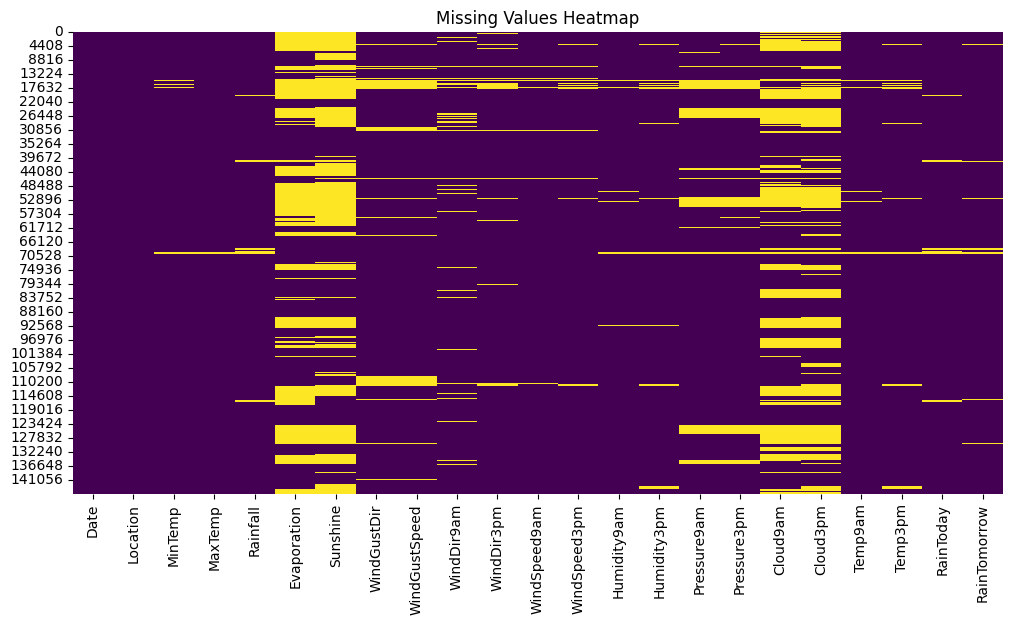

In [5]:
# Visualization: Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [6]:
# Step 2: Handle Missing Values
# Drop columns with too many missing values (>40%)
missing_threshold = 0.4  # 40%
df = df.dropna(thresh=len(df) * (1 - missing_threshold), axis=1)

In [7]:
df.shape

(145460, 20)

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [9]:
# Fill numerical missing values with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [11]:
# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

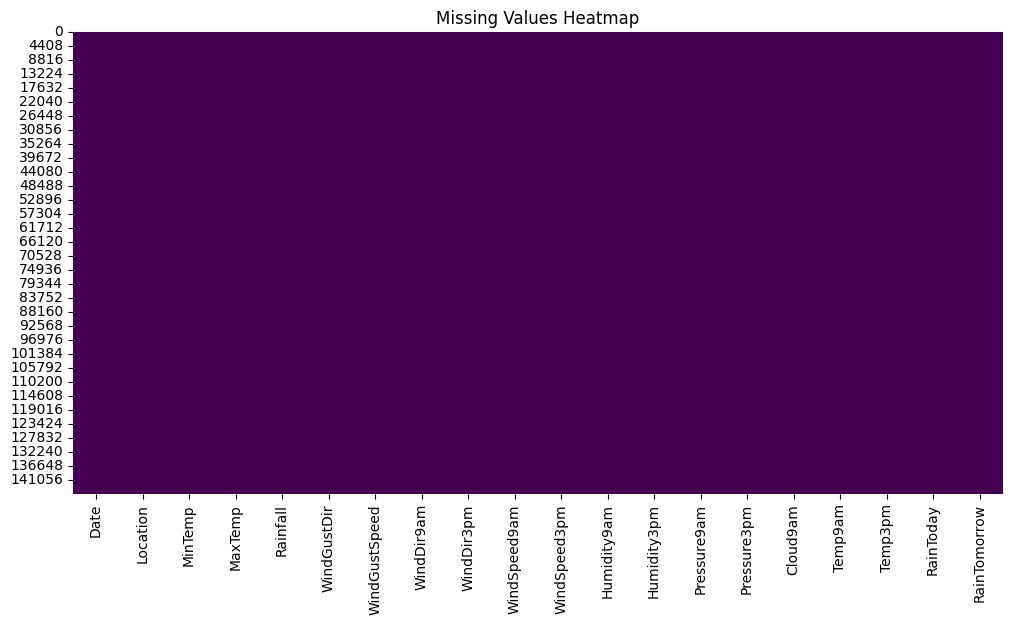

In [12]:
# ReVisualization: Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

##### Feature Engineering of Date

In [13]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year (can be useful for trends over time)
df['Year'] = df['Date'].dt.year

# Cyclic Encoding for Month & Day
df['Month_sin'] = np.sin(2 * np.pi * df['Date'].dt.month / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Date'].dt.month / 12)

df['Day_sin'] = np.sin(2 * np.pi * df['Date'].dt.day / 31)
df['Day_cos'] = np.cos(2 * np.pi * df['Date'].dt.day / 31)

# Define seasons based on months (Australia Seasons)
def get_season(month):
    if month in [12, 1, 2]:  
        return 'Summer'
    elif month in [3, 4, 5]:  
        return 'Autumn'
    elif month in [6, 7, 8]:  
        return 'Winter'
    else:  
        return 'Spring'

df['Season'] = df['Date'].dt.month.apply(get_season)

# Drop original 'Date' column
df.drop(columns=['Date'], inplace=True)

# One-Hot Encoding for Season & Location
df = pd.get_dummies(df, columns=['Season', 'Location'], drop_first=True)

# Label Encoding for categorical wind features
label_enc_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
label_encoders = {}

for col in label_enc_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Display dataset after transformations
df.head()


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,...,False,False,False,False,False,False,False,False,False,False
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,...,False,False,False,False,False,False,False,False,False,False
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,...,False,False,False,False,False,False,False,False,False,False
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,...,False,False,False,False,False,False,False,False,False,False


In [14]:
print(df.columns)


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month_sin',
       'Month_cos', 'Day_sin', 'Day_cos', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Location_Albany', 'Location_Albury',
       'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast',
       'Location_Hobart', 'Location_Katherine', 'Location_Launceston',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura',
       'Location_Moree', 'Location_MountGambier', 'Location_MountGinini',
       'Location_Newcastle', 'Location_Nhil', 'Location

In [19]:
# Identify categorical columns again to ensure 'Date' is not included
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", cat_cols)



Categorical Columns: ['RainTomorrow']


In [20]:
cat_cols = [col for col in cat_cols if col != 'Date']

In [21]:
# Step 3: Encode Categorical Variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [22]:
# Step 4: Handle Outliers using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

<Figure size 1200x800 with 0 Axes>

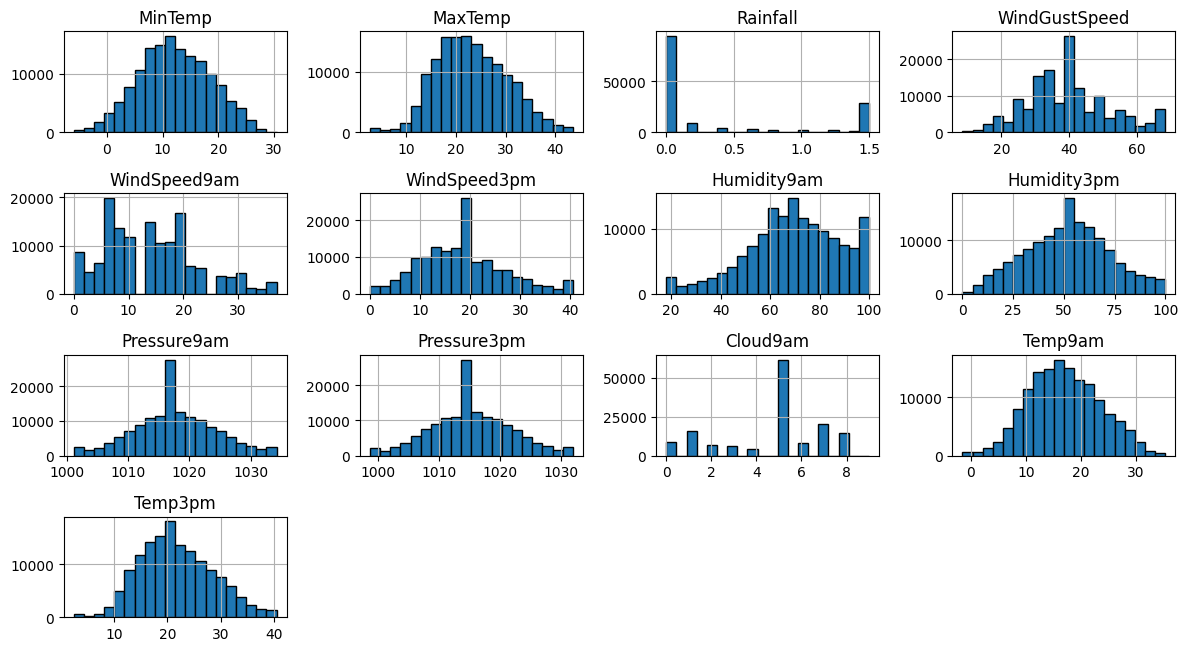

In [23]:
# Visualization: Distribution of Features
plt.figure(figsize=(12, 8))
df[num_cols].hist(bins=20, figsize=(12, 8), layout=(5, 4), edgecolor='black')
plt.tight_layout()
plt.show()


In [24]:
# Step 5: Feature Scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [26]:
# Step 6: Handle Class Imbalance using SMOTE
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']
X_resampled, y_resampled = SMOTE().fit_resample(X, y)


In [27]:
# Step 7: Train & Evaluate Models
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [28]:
df.isnull().sum().sum()

0

In [29]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9098912708544262
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     22586
           1       0.91      0.91      0.91     22848

    accuracy                           0.91     45434
   macro avg       0.91      0.91      0.91     45434
weighted avg       0.91      0.91      0.91     45434



In [30]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7740678786811639
              precision    recall  f1-score   support

           0       0.77      0.78      0.77     22586
           1       0.78      0.77      0.77     22848

    accuracy                           0.77     45434
   macro avg       0.77      0.77      0.77     45434
weighted avg       0.77      0.77      0.77     45434



In [31]:
# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9061495796099837
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22586
           1       0.94      0.87      0.90     22848

    accuracy                           0.91     45434
   macro avg       0.91      0.91      0.91     45434
weighted avg       0.91      0.91      0.91     45434



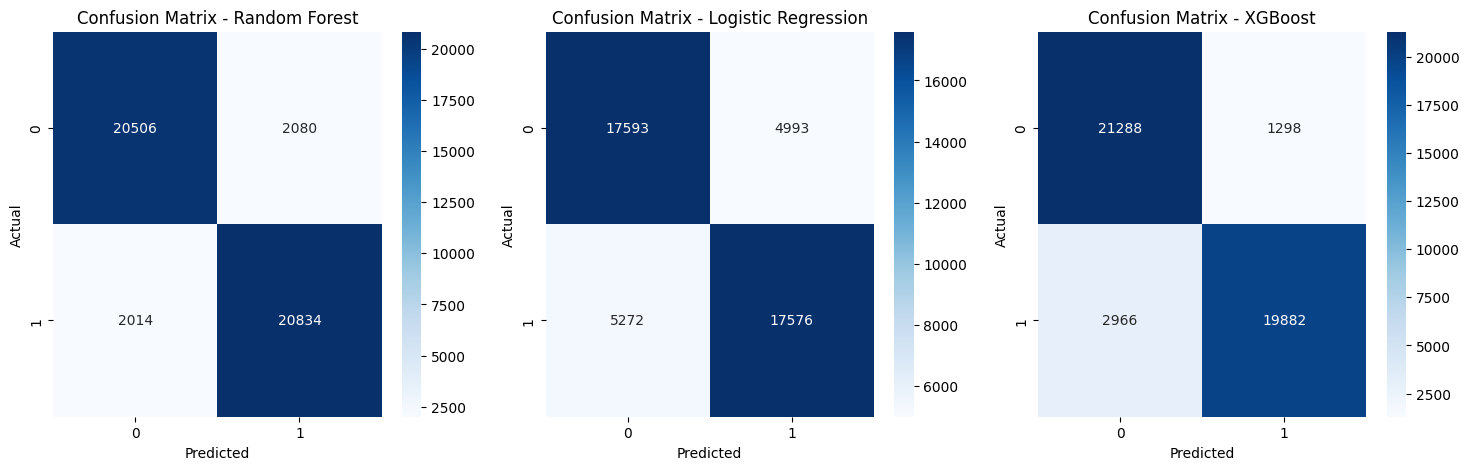

In [32]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, model, y_pred, title in zip(axes, [rf_model, log_reg, xgb_model], [y_pred_rf, y_pred_lr, y_pred_xgb], ["Random Forest", "Logistic Regression", "XGBoost"]):
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"Confusion Matrix - {title}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.show()


## Insights and Conclusion  

1. **Random Forest** performed the best with an accuracy of **90.99%**. It maintained a strong balance between **precision, recall, and F1-score**, achieving **0.91** in all metrics. This indicates that the model is highly effective in distinguishing between both classes.  

2. **XGBoost** followed closely with an accuracy of **90.61%**. It exhibited slightly better **class-wise performance**—with higher precision for class 1 (0.94) and a slightly lower recall for the same class (0.87). This suggests that XGBoost is slightly more conservative in predicting class 1 but performs well overall.  

3. **Logistic Regression** had the lowest performance, with an accuracy of **77.40%**. All evaluation metrics (precision, recall, and F1-score) were significantly lower (**0.77–0.78**), indicating that a linear approach may not be well-suited for this dataset.  

### Conclusion  
Random Forest and XGBoost are both excellent choices, with Random Forest having a slight edge in overall accuracy. Logistic Regression, while interpretable, is significantly weaker in performance. If computational resources allow, **Random Forest or XGBoost should be preferred** for final deployment, depending on specific use-case requirements (e.g., feature importance, interpretability, or speed).
